In [161]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact, chisquare
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
# sharper plots
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("E:/.ML/[Анатолий Карпов] [Stepic] Data Analytic Часть 1/4/Задания/taxi_peru.csv", parse_dates=['arrived_at', 'end_at', 'start_at'], sep=';')
df_shape = f'df has {df.shape[0]} rows and {df.shape[1]} columns'
df_shape

'df has 23111 rows and 19 columns'

In [3]:
na_number = df.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

In [4]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [5]:
# df['arrived_at'] = pd.to_datetime(df['arrived_at'])
df[['arrived_at', 'end_at', 'start_at']] = df[['arrived_at', 'end_at', 'start_at']].apply(pd.to_datetime)
df_types = df.dtypes
df_types

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [6]:
df.drop_duplicates(subset='journey_id').head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [7]:
df_urgent = df.query("(start_type == 'asap') | (start_type == 'reserved')")

In [8]:
df_urgent['wait_time'] = (df.arrived_at - df.start_at).astype('timedelta64[m]')
df_urgent['wait_time']

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23091, dtype: float64

In [9]:
most_delayed_driver = df_urgent.query("start_type == 'reserved' & wait_time > 0.0").groupby('driver_id') \
                    .agg({'journey_id': 'count'}).idxmax().rename({'journey_id':'driver_id'})

In [10]:
df_urgent.query('driver_id == "406921adcca37705ef527b4246c0cfea"').head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
9,9448070ece760ea5386e5d4822121a6c,dd23cf0ef33ae44e0c0b4c756e1fe4e8,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-11-22 23:42:00,"-12,08969627","-77,03574926",2010-11-23 00:53:00,"-12,03449872","-77,03020982",drop off,"-12,0898203","-77,0358663",2010-11-23 00:05:00,Android,5.0,5.0,23.0
21,7abecd4f47c2c1d5390d86eb221babff,d0d21e2cc815fa276295ce3c51811d4e,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-04-26 21:42:00,"-12,0834957","-77,0493404",2010-04-26 21:59:00,"-12,068517","-77,041334",drop off,"-12,08911977","-77,03838321",2010-04-26 21:51:00,web,NaN,0.0,9.0
23,23be2836bd1f20bf05c9ffa3aa6db37c,410389a59b3c36fa86e76bce43d9a336,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-05-20 16:27:00,"-12,1099832","-76,975818",2010-05-20 17:16:00,"-12,1254832","-77,0293897",drop off,"-12,098508","-76,99515788",2010-05-20 16:16:00,web,NaN,5.0,-11.0
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0
87,ddda7d9d71d2000dcf144987a3ea3d61,68fe4d0ad82cc2d715d1319533380c76,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-09-28 02:03:00,"-12,10496521","-77,04000854",2010-09-28 02:04:00,"-12,10495377","-77,03707886",driver cancel,"-12,09203639","-77,02922599",NaT,iPhone,NaN,NaN,NaN


In [11]:
df['month'] = df.start_at.dt.month
df['weekday'] = df.start_at.dt.weekday

In [12]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,11,1
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,6,1
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,"-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,5,0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,"-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,6,1
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,9,5


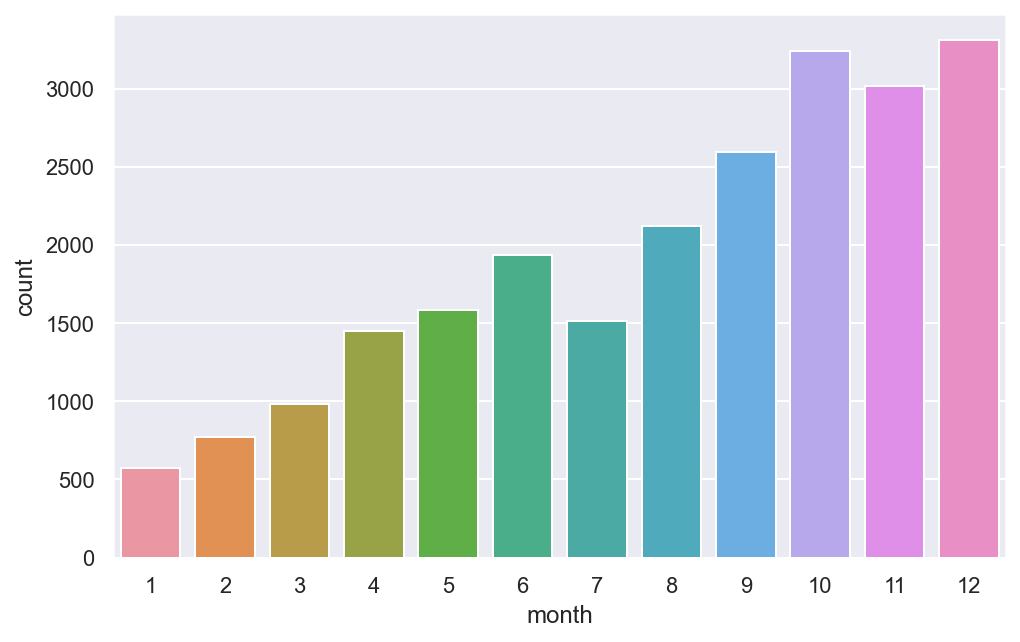

In [32]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='month', data=df);
# date_form = mdates.DateFormatter("%b-%d")
# ax.xaxis.set_major_formatter(date_form)

###### 

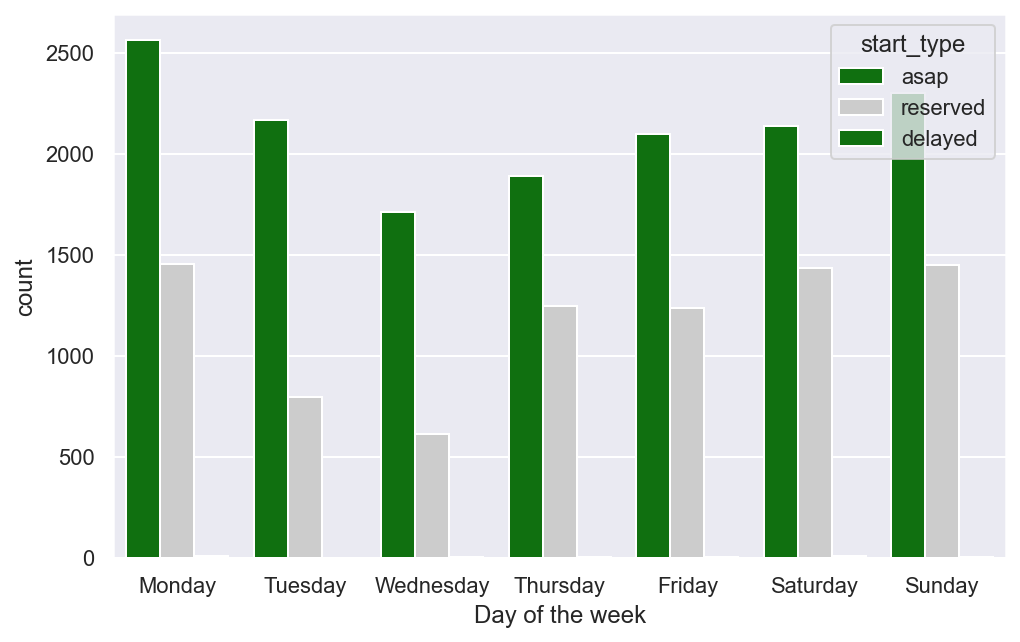

In [51]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df.start_at.dt.strftime('%A'), data=df, hue='start_type',
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                   palette=['green', '#cccccc']);
ax.set_xlabel("Day of the week");
plt.show()

## DAU

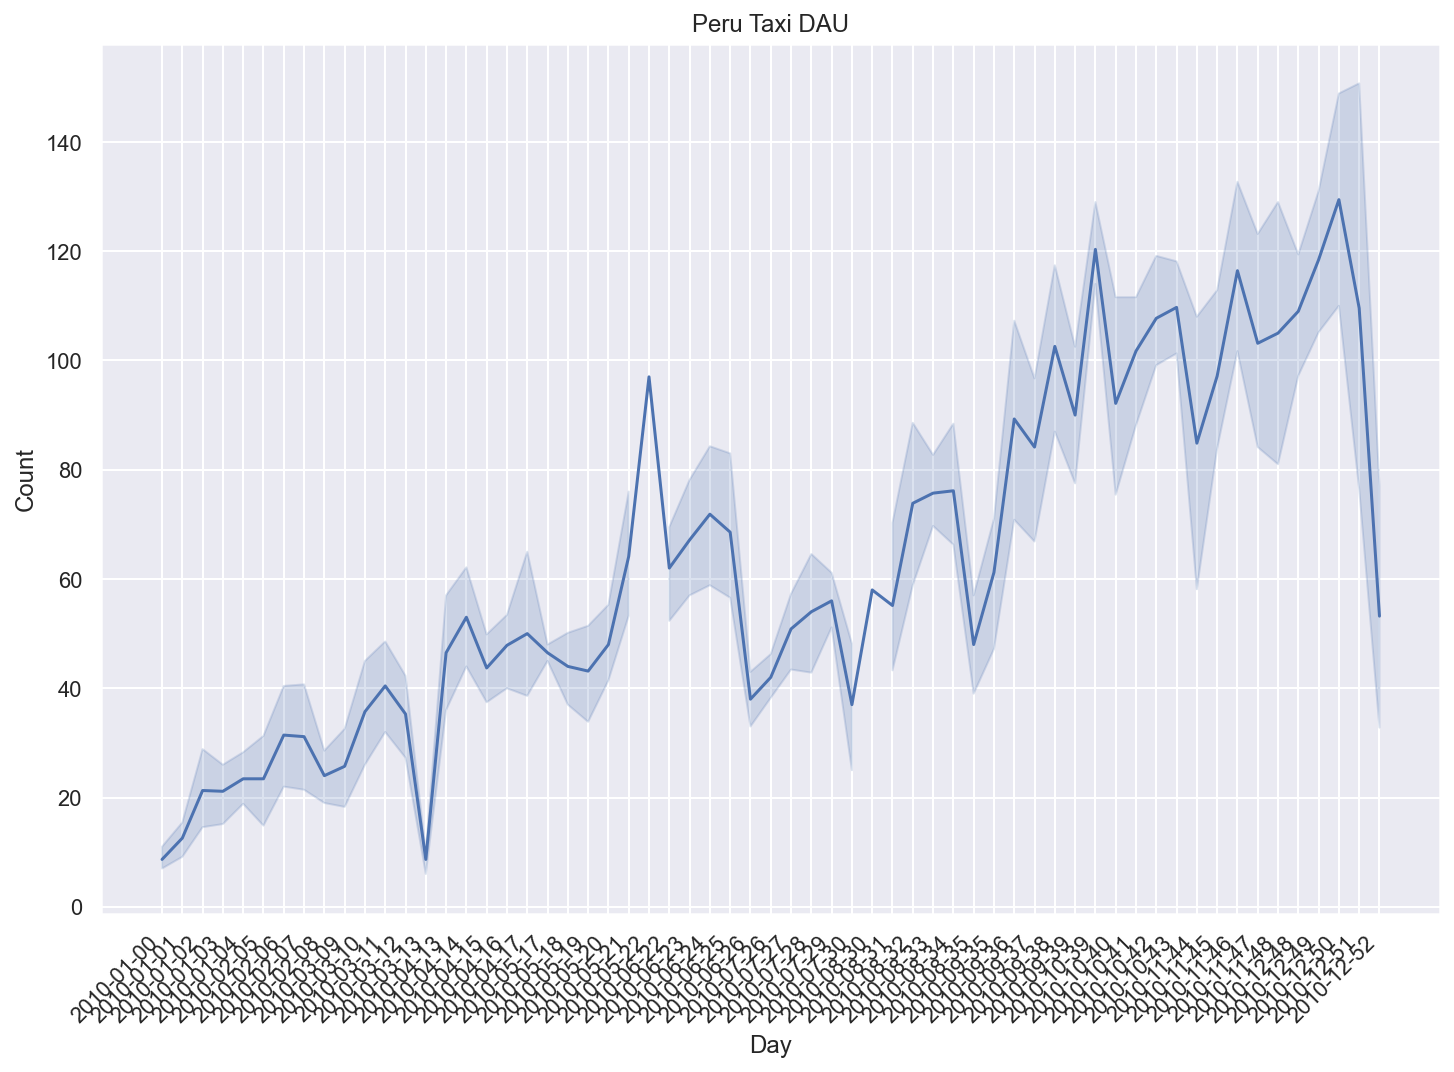

In [159]:
plt.figure(figsize=(12,8))
dau_df = df.groupby(pd.Grouper(key='start_at', axis=0, freq='D'))['journey_id'].nunique().reset_index()
ax = sns.lineplot(x=dau_df.start_at.dt.strftime("%Y-%m-%W"), y='journey_id', data=dau_df)

x_dates = dau_df['start_at'].dt.strftime('%Y-%m-%W').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_xlabel("Day")
ax.set_ylabel("Count")
ax.set_title("Peru Taxi DAU")
plt.show()

## WAU

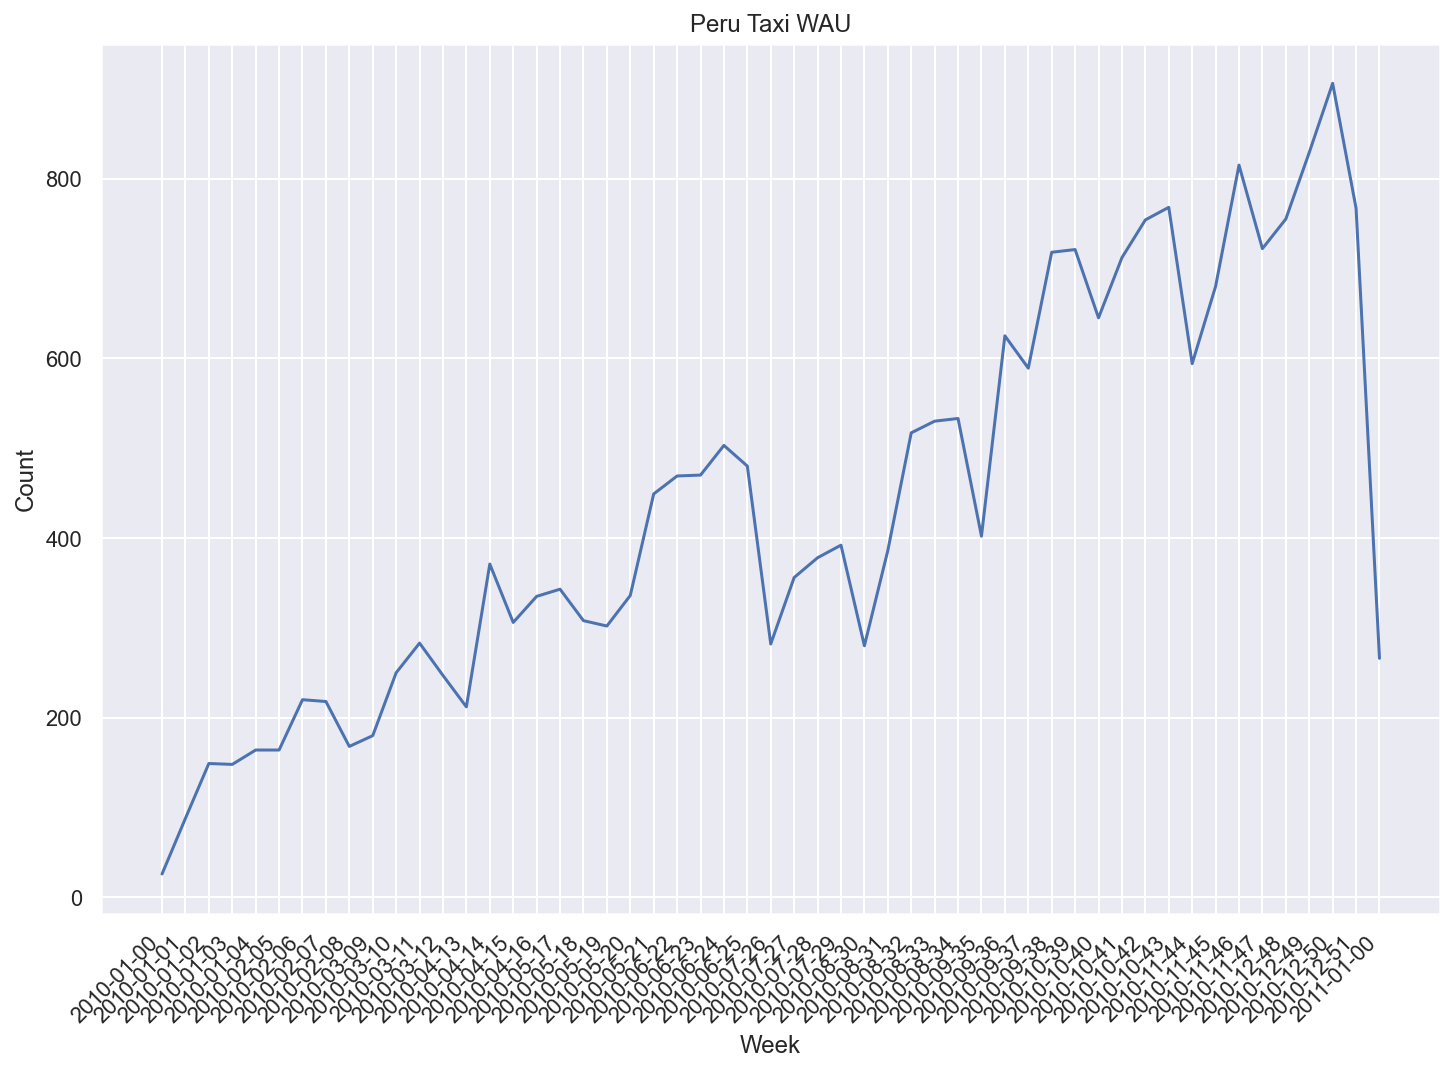

In [160]:
plt.figure(figsize=(12,8))
wau_df = df.groupby(pd.Grouper(key='start_at', axis=0, freq='W'))['journey_id'].nunique().reset_index()
ax = sns.lineplot(x=wau_df.start_at.dt.strftime("%Y-%m-%W"), y='journey_id', data=wau_df)

x_dates = wau_df['start_at'].dt.strftime('%Y-%m-%W').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_xlabel("Week")
ax.set_ylabel("Count")
ax.set_title("Peru Taxi WAU")
plt.show()

## MAU

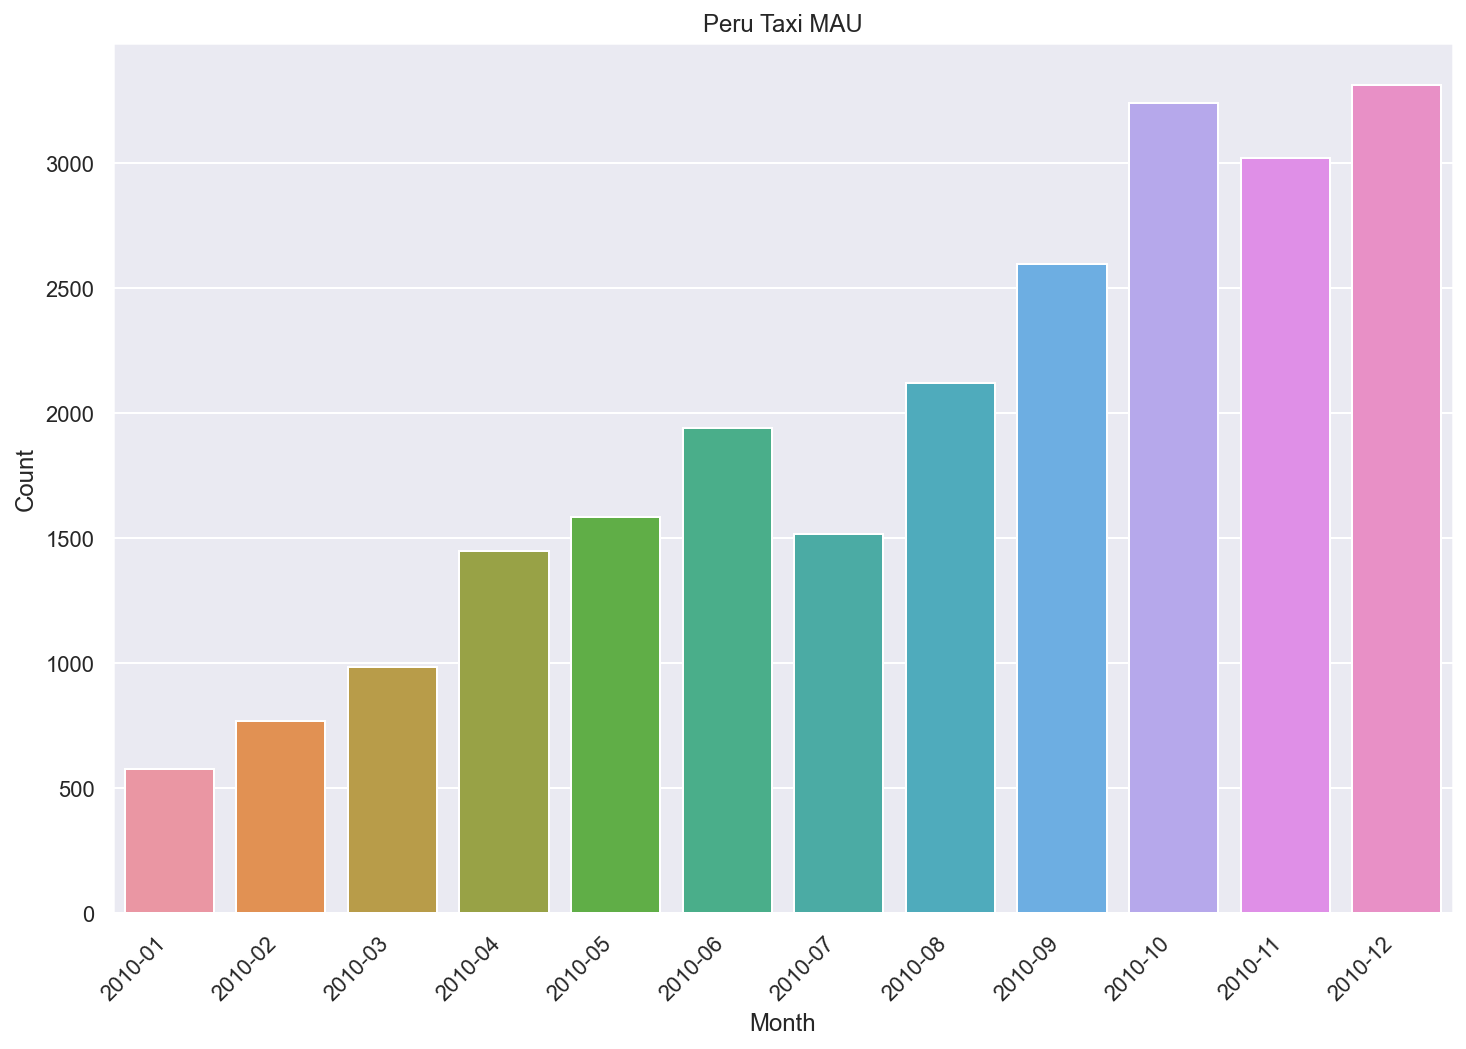

In [137]:
plt.figure(figsize=(12,8))
mau_df = df.groupby(pd.Grouper(key='start_at', axis=0, freq='M'))['journey_id'].nunique().reset_index()
ax = sns.barplot(x=mau_df.start_at.dt.strftime("%Y-%m-%d"), y='journey_id', data=mau_df)

x_dates = mau_df['start_at'].dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.set_title("Peru Taxi MAU")
plt.show()